In [12]:
import time

import matplotlib.pyplot as plt
import numpy as np

from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,OneHotEncoder
from sklearn.utils import check_random_state
from FFNN import FFNN


In [13]:
# Turn down for faster convergence
t0 = time.time()
train_samples = 5000

# Load data from https://www.openml.org/d/554
X, y = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)
random_state = check_random_state(0)
permutation = random_state.permutation(X.shape[0])
X = X[permutation]
y = y[permutation]
X = X.reshape((X.shape[0], -1))

In [14]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=train_samples, test_size=10000
)

Sparsity with L1 penalty: 75.68%
Test score with L1 penalty: 0.8255
Example run in 21.671 s


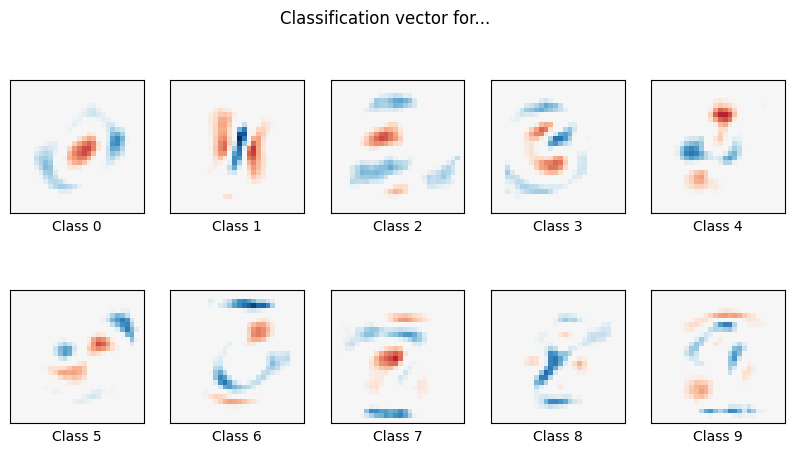

In [15]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Turn up tolerance for faster convergence
clf = LogisticRegression(C=50.0 / train_samples, penalty="l1", solver="saga", tol=0.1)
clf.fit(X_train, y_train)
sparsity = np.mean(clf.coef_ == 0) * 100
score = clf.score(X_test, y_test)
# print('Best C % .4f' % clf.C_)
print("Sparsity with L1 penalty: %.2f%%" % sparsity)
print("Test score with L1 penalty: %.4f" % score)

coef = clf.coef_.copy()
plt.figure(figsize=(10, 5))
scale = np.abs(coef).max()
for i in range(10):
    l1_plot = plt.subplot(2, 5, i + 1)
    l1_plot.imshow(
        coef[i].reshape(28, 28),
        interpolation="nearest",
        cmap=plt.cm.RdBu,
        vmin=-scale,
        vmax=scale,
    )
    l1_plot.set_xticks(())
    l1_plot.set_yticks(())
    l1_plot.set_xlabel("Class %i" % i)
plt.suptitle("Classification vector for...")

run_time = time.time() - t0
print("Example run in %.3f s" % run_time)
plt.show()

In [16]:
X_train, X_val, y_train, y_val = train_test_split(
    X_train, y_train, test_size=0.1, random_state=42
)

## Depth Variation

Epoch 1/20 - Train Loss: 1.9669 - Val Loss: 2.0240
Epoch 2/20 - Train Loss: 1.6052 - Val Loss: 1.6918
Epoch 3/20 - Train Loss: 1.3226 - Val Loss: 1.4034
Epoch 4/20 - Train Loss: 1.1015 - Val Loss: 1.1809
Epoch 5/20 - Train Loss: 0.9512 - Val Loss: 1.0224
Epoch 6/20 - Train Loss: 0.8346 - Val Loss: 0.9307
Epoch 7/20 - Train Loss: 0.7477 - Val Loss: 0.8152
Epoch 8/20 - Train Loss: 0.6787 - Val Loss: 0.7743
Epoch 9/20 - Train Loss: 0.6277 - Val Loss: 0.6909
Epoch 10/20 - Train Loss: 0.5730 - Val Loss: 0.6751
Epoch 11/20 - Train Loss: 0.5371 - Val Loss: 0.6307
Epoch 12/20 - Train Loss: 0.4967 - Val Loss: 0.5918
Epoch 13/20 - Train Loss: 0.4663 - Val Loss: 0.5537
Epoch 14/20 - Train Loss: 0.4419 - Val Loss: 0.5526
Epoch 15/20 - Train Loss: 0.4187 - Val Loss: 0.5191
Epoch 16/20 - Train Loss: 0.3995 - Val Loss: 0.5228
Epoch 17/20 - Train Loss: 0.3828 - Val Loss: 0.4876
Epoch 18/20 - Train Loss: 0.3670 - Val Loss: 0.4872
Epoch 19/20 - Train Loss: 0.3468 - Val Loss: 0.4592
Epoch 20/20 - Train L

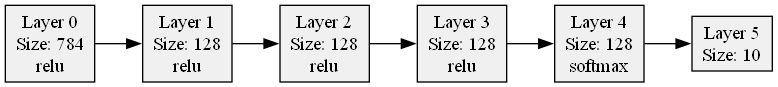

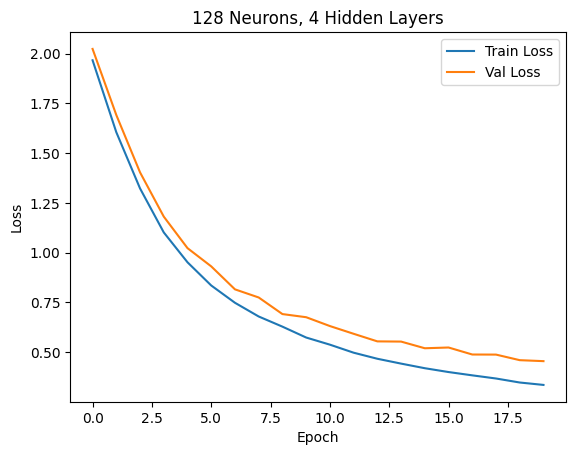

Epoch 1/20 - Train Loss: 1.9211 - Val Loss: 1.8992
Epoch 2/20 - Train Loss: 1.5689 - Val Loss: 1.5941
Epoch 3/20 - Train Loss: 1.3240 - Val Loss: 1.3502
Epoch 4/20 - Train Loss: 1.1370 - Val Loss: 1.1716
Epoch 5/20 - Train Loss: 0.9968 - Val Loss: 1.0352
Epoch 6/20 - Train Loss: 0.8874 - Val Loss: 0.9477
Epoch 7/20 - Train Loss: 0.8024 - Val Loss: 0.8546
Epoch 8/20 - Train Loss: 0.7330 - Val Loss: 0.7971
Epoch 9/20 - Train Loss: 0.6773 - Val Loss: 0.7358
Epoch 10/20 - Train Loss: 0.6268 - Val Loss: 0.7083
Epoch 11/20 - Train Loss: 0.5890 - Val Loss: 0.6785
Epoch 12/20 - Train Loss: 0.5512 - Val Loss: 0.6344
Epoch 13/20 - Train Loss: 0.5206 - Val Loss: 0.6057
Epoch 14/20 - Train Loss: 0.4928 - Val Loss: 0.5884
Epoch 15/20 - Train Loss: 0.4693 - Val Loss: 0.5638
Epoch 16/20 - Train Loss: 0.4471 - Val Loss: 0.5540
Epoch 17/20 - Train Loss: 0.4270 - Val Loss: 0.5321
Epoch 18/20 - Train Loss: 0.4089 - Val Loss: 0.5164
Epoch 19/20 - Train Loss: 0.3930 - Val Loss: 0.5082
Epoch 20/20 - Train L

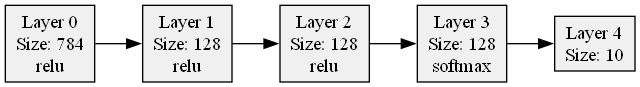

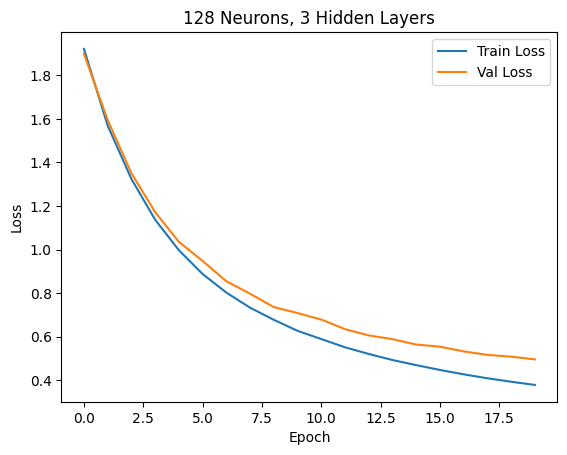

Epoch 1/20 - Train Loss: 2.0892 - Val Loss: 2.0687
Epoch 2/20 - Train Loss: 1.5931 - Val Loss: 1.6067
Epoch 3/20 - Train Loss: 1.3064 - Val Loss: 1.3302
Epoch 4/20 - Train Loss: 1.1158 - Val Loss: 1.1571
Epoch 5/20 - Train Loss: 0.9804 - Val Loss: 1.0314
Epoch 6/20 - Train Loss: 0.8780 - Val Loss: 0.9418
Epoch 7/20 - Train Loss: 0.7983 - Val Loss: 0.8636
Epoch 8/20 - Train Loss: 0.7334 - Val Loss: 0.8049
Epoch 9/20 - Train Loss: 0.6795 - Val Loss: 0.7516
Epoch 10/20 - Train Loss: 0.6345 - Val Loss: 0.7159
Epoch 11/20 - Train Loss: 0.5964 - Val Loss: 0.6781
Epoch 12/20 - Train Loss: 0.5632 - Val Loss: 0.6449
Epoch 13/20 - Train Loss: 0.5343 - Val Loss: 0.6168
Epoch 14/20 - Train Loss: 0.5082 - Val Loss: 0.5957
Epoch 15/20 - Train Loss: 0.4854 - Val Loss: 0.5733
Epoch 16/20 - Train Loss: 0.4648 - Val Loss: 0.5585
Epoch 17/20 - Train Loss: 0.4461 - Val Loss: 0.5398
Epoch 18/20 - Train Loss: 0.4293 - Val Loss: 0.5233
Epoch 19/20 - Train Loss: 0.4140 - Val Loss: 0.5068
Epoch 20/20 - Train L

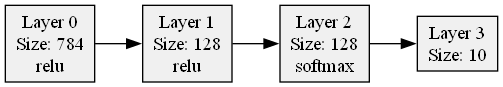

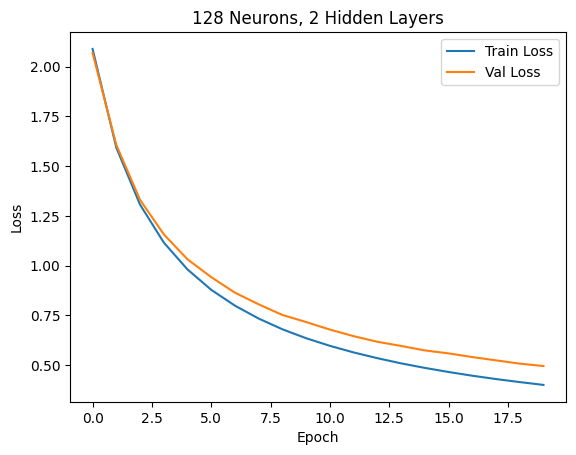


================= Hasil Perbandingan =================
TC 1 Accuracy: 85.62% | Waktu: 7.60s
TC 2 Accuracy: 85.30% | Waktu: 5.35s
TC 3 Accuracy: 84.81% | Waktu: 3.20s


In [17]:
## Variasi depth FFNN
# 4 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 3 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 3 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 2 hidden layer
# ==============================
layer_sizes = [784, 128, 128, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 2 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Width Variation

Epoch 1/20 - Train Loss: 1.9558 - Val Loss: 2.0075
Epoch 2/20 - Train Loss: 1.6113 - Val Loss: 1.7018
Epoch 3/20 - Train Loss: 1.3208 - Val Loss: 1.4508
Epoch 4/20 - Train Loss: 1.1183 - Val Loss: 1.2698
Epoch 5/20 - Train Loss: 0.9455 - Val Loss: 1.1045
Epoch 6/20 - Train Loss: 0.8119 - Val Loss: 0.9857
Epoch 7/20 - Train Loss: 0.7255 - Val Loss: 0.9082
Epoch 8/20 - Train Loss: 0.6563 - Val Loss: 0.8515
Epoch 9/20 - Train Loss: 0.5961 - Val Loss: 0.7943
Epoch 10/20 - Train Loss: 0.5566 - Val Loss: 0.7619
Epoch 11/20 - Train Loss: 0.5126 - Val Loss: 0.7199
Epoch 12/20 - Train Loss: 0.4797 - Val Loss: 0.6908
Epoch 13/20 - Train Loss: 0.4519 - Val Loss: 0.6649
Epoch 14/20 - Train Loss: 0.4237 - Val Loss: 0.6489
Epoch 15/20 - Train Loss: 0.4053 - Val Loss: 0.6343
Epoch 16/20 - Train Loss: 0.3811 - Val Loss: 0.6141
Epoch 17/20 - Train Loss: 0.3644 - Val Loss: 0.6071
Epoch 18/20 - Train Loss: 0.3493 - Val Loss: 0.5926
Epoch 19/20 - Train Loss: 0.3337 - Val Loss: 0.5822
Epoch 20/20 - Train L

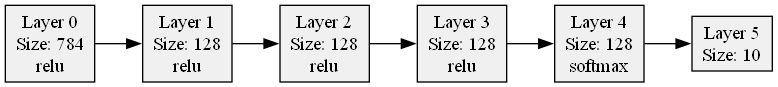

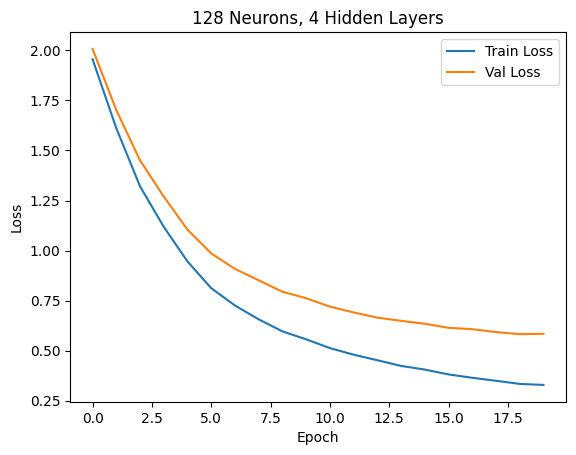

Epoch 1/20 - Train Loss: 2.3053 - Val Loss: 2.3120
Epoch 2/20 - Train Loss: 2.2700 - Val Loss: 2.2800
Epoch 3/20 - Train Loss: 2.2307 - Val Loss: 2.2452
Epoch 4/20 - Train Loss: 2.1826 - Val Loss: 2.2033
Epoch 5/20 - Train Loss: 2.1220 - Val Loss: 2.1503
Epoch 6/20 - Train Loss: 2.0436 - Val Loss: 2.0839
Epoch 7/20 - Train Loss: 1.9493 - Val Loss: 2.0041
Epoch 8/20 - Train Loss: 1.8431 - Val Loss: 1.9162
Epoch 9/20 - Train Loss: 1.7318 - Val Loss: 1.8228
Epoch 10/20 - Train Loss: 1.6188 - Val Loss: 1.7254
Epoch 11/20 - Train Loss: 1.5054 - Val Loss: 1.6251
Epoch 12/20 - Train Loss: 1.3946 - Val Loss: 1.5257
Epoch 13/20 - Train Loss: 1.2874 - Val Loss: 1.4251
Epoch 14/20 - Train Loss: 1.1846 - Val Loss: 1.3270
Epoch 15/20 - Train Loss: 1.0928 - Val Loss: 1.2353
Epoch 16/20 - Train Loss: 1.0085 - Val Loss: 1.1588
Epoch 17/20 - Train Loss: 0.9353 - Val Loss: 1.0829
Epoch 18/20 - Train Loss: 0.8724 - Val Loss: 1.0227
Epoch 19/20 - Train Loss: 0.8178 - Val Loss: 0.9665
Epoch 20/20 - Train L

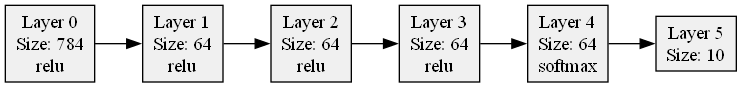

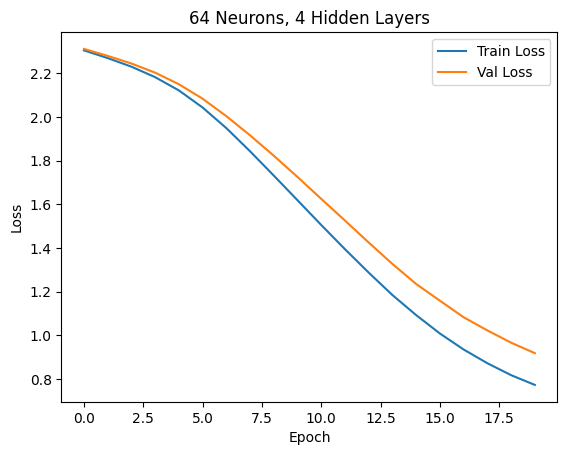

Epoch 1/20 - Train Loss: 2.3017 - Val Loss: 2.3034
Epoch 2/20 - Train Loss: 2.2992 - Val Loss: 2.3013
Epoch 3/20 - Train Loss: 2.2967 - Val Loss: 2.2991
Epoch 4/20 - Train Loss: 2.2940 - Val Loss: 2.2968
Epoch 5/20 - Train Loss: 2.2912 - Val Loss: 2.2943
Epoch 6/20 - Train Loss: 2.2882 - Val Loss: 2.2917
Epoch 7/20 - Train Loss: 2.2850 - Val Loss: 2.2889
Epoch 8/20 - Train Loss: 2.2814 - Val Loss: 2.2859
Epoch 9/20 - Train Loss: 2.2776 - Val Loss: 2.2826
Epoch 10/20 - Train Loss: 2.2733 - Val Loss: 2.2790
Epoch 11/20 - Train Loss: 2.2686 - Val Loss: 2.2750
Epoch 12/20 - Train Loss: 2.2633 - Val Loss: 2.2703
Epoch 13/20 - Train Loss: 2.2572 - Val Loss: 2.2649
Epoch 14/20 - Train Loss: 2.2502 - Val Loss: 2.2587
Epoch 15/20 - Train Loss: 2.2421 - Val Loss: 2.2514
Epoch 16/20 - Train Loss: 2.2327 - Val Loss: 2.2429
Epoch 17/20 - Train Loss: 2.2218 - Val Loss: 2.2330
Epoch 18/20 - Train Loss: 2.2089 - Val Loss: 2.2213
Epoch 19/20 - Train Loss: 2.1934 - Val Loss: 2.2073
Epoch 20/20 - Train L

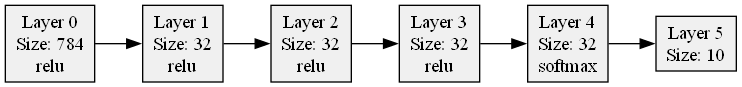

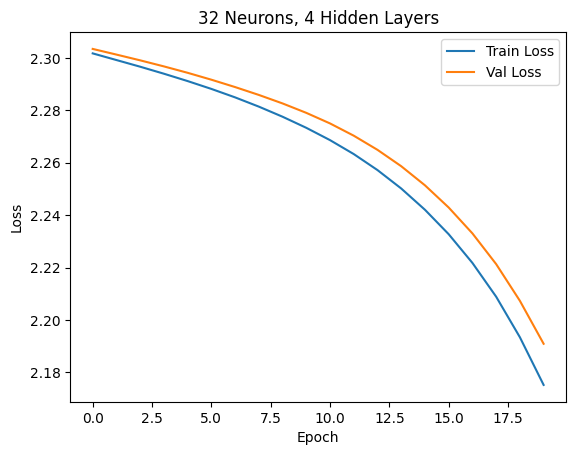


================= Hasil Perbandingan =================
TC 1 Accuracy: 84.86% | Waktu: 11.90s
TC 2 Accuracy: 74.72% | Waktu: 4.28s
TC 3 Accuracy: 36.68% | Waktu: 3.61s


In [20]:
## Variasi width FFNN
# 128 neuron
# ==============================
layer_sizes = [784, 128, 128, 128, 128, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('128 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0

# 64 neuron
# ==============================
layer_sizes = [784, 64, 64, 64, 64, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('64 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0

# 32 neuron
# ==============================
layer_sizes = [784, 32, 32, 32, 32, 10]
activations = ['relu', 'relu', 'relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('32 Neurons, 4 Hidden Layers')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Activation Function Variation

Epoch 1/20 - Train Loss: 2.0908 - Val Loss: 2.1068
Epoch 2/20 - Train Loss: 1.7758 - Val Loss: 1.8125
Epoch 3/20 - Train Loss: 1.5362 - Val Loss: 1.5811
Epoch 4/20 - Train Loss: 1.3508 - Val Loss: 1.4006
Epoch 5/20 - Train Loss: 1.2080 - Val Loss: 1.2630
Epoch 6/20 - Train Loss: 1.0949 - Val Loss: 1.1521
Epoch 7/20 - Train Loss: 1.0041 - Val Loss: 1.0648
Epoch 8/20 - Train Loss: 0.9294 - Val Loss: 0.9939
Epoch 9/20 - Train Loss: 0.8667 - Val Loss: 0.9302
Epoch 10/20 - Train Loss: 0.8128 - Val Loss: 0.8814
Epoch 11/20 - Train Loss: 0.7664 - Val Loss: 0.8357
Epoch 12/20 - Train Loss: 0.7257 - Val Loss: 0.7957
Epoch 13/20 - Train Loss: 0.6896 - Val Loss: 0.7631
Epoch 14/20 - Train Loss: 0.6574 - Val Loss: 0.7303
Epoch 15/20 - Train Loss: 0.6287 - Val Loss: 0.7029
Epoch 16/20 - Train Loss: 0.6027 - Val Loss: 0.6773
Epoch 17/20 - Train Loss: 0.5791 - Val Loss: 0.6537
Epoch 18/20 - Train Loss: 0.5575 - Val Loss: 0.6363
Epoch 19/20 - Train Loss: 0.5379 - Val Loss: 0.6166
Epoch 20/20 - Train L

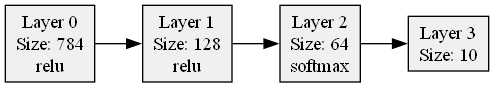

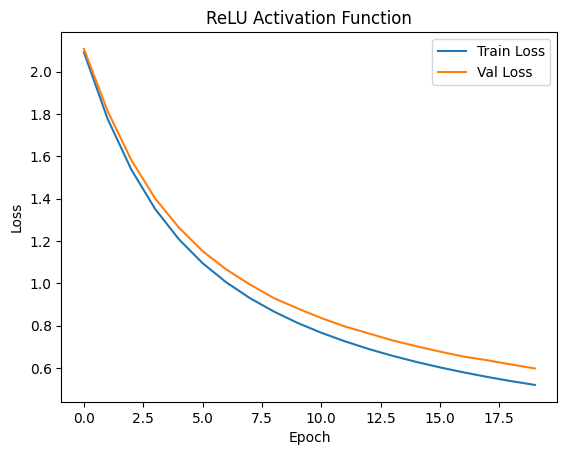

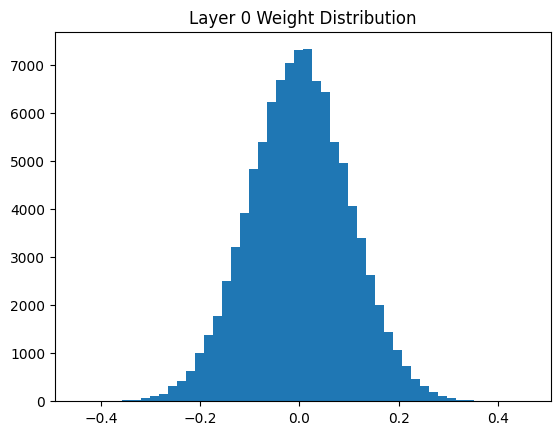

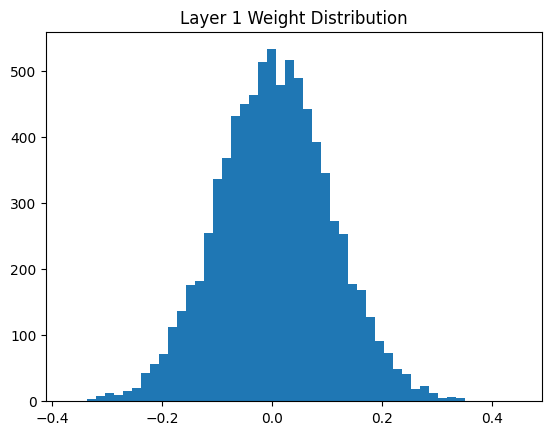

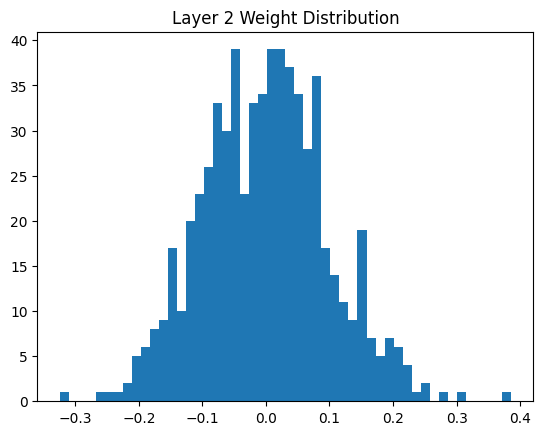

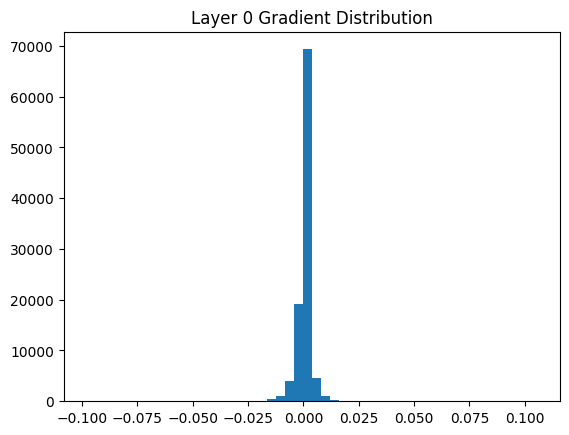

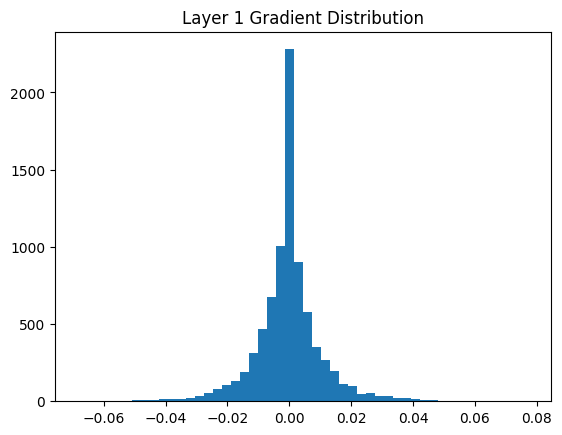

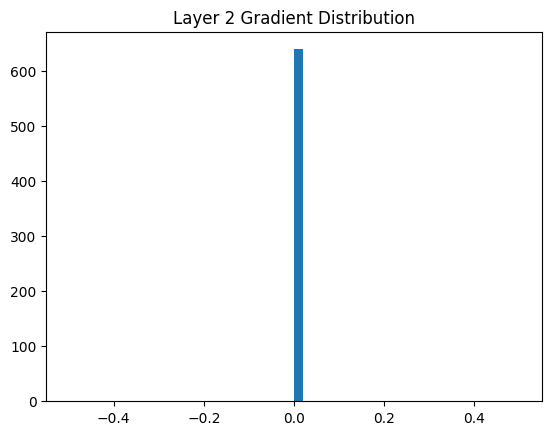

Epoch 1/20 - Train Loss: 2.3299 - Val Loss: 2.3303
Epoch 2/20 - Train Loss: 2.3211 - Val Loss: 2.3219
Epoch 3/20 - Train Loss: 2.3127 - Val Loss: 2.3139
Epoch 4/20 - Train Loss: 2.3046 - Val Loss: 2.3062
Epoch 5/20 - Train Loss: 2.2967 - Val Loss: 2.2986
Epoch 6/20 - Train Loss: 2.2890 - Val Loss: 2.2913
Epoch 7/20 - Train Loss: 2.2817 - Val Loss: 2.2842
Epoch 8/20 - Train Loss: 2.2746 - Val Loss: 2.2775
Epoch 9/20 - Train Loss: 2.2677 - Val Loss: 2.2709
Epoch 10/20 - Train Loss: 2.2610 - Val Loss: 2.2645
Epoch 11/20 - Train Loss: 2.2544 - Val Loss: 2.2581
Epoch 12/20 - Train Loss: 2.2481 - Val Loss: 2.2520
Epoch 13/20 - Train Loss: 2.2418 - Val Loss: 2.2460
Epoch 14/20 - Train Loss: 2.2356 - Val Loss: 2.2400
Epoch 15/20 - Train Loss: 2.2296 - Val Loss: 2.2342
Epoch 16/20 - Train Loss: 2.2238 - Val Loss: 2.2284
Epoch 17/20 - Train Loss: 2.2180 - Val Loss: 2.2228
Epoch 18/20 - Train Loss: 2.2122 - Val Loss: 2.2173
Epoch 19/20 - Train Loss: 2.2066 - Val Loss: 2.2119
Epoch 20/20 - Train L

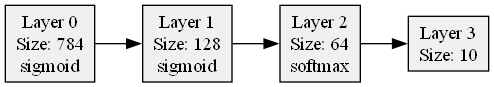

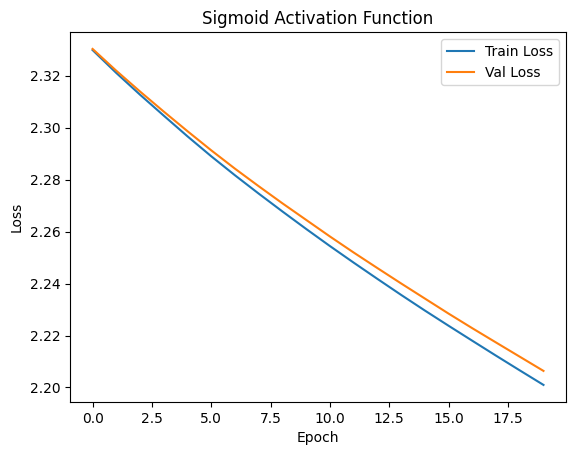

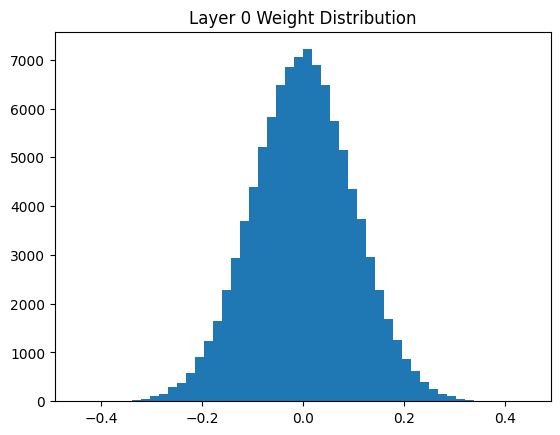

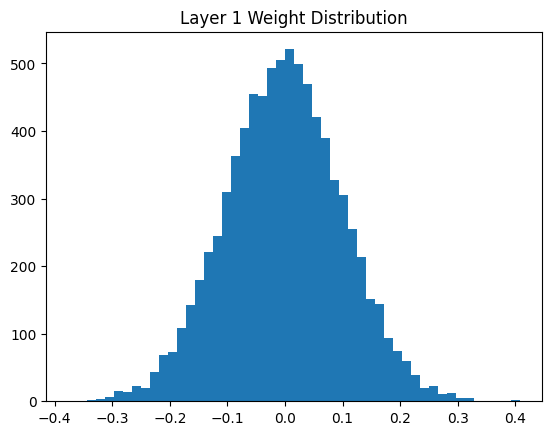

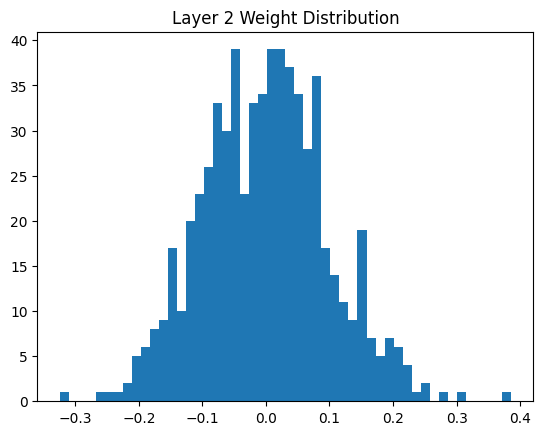

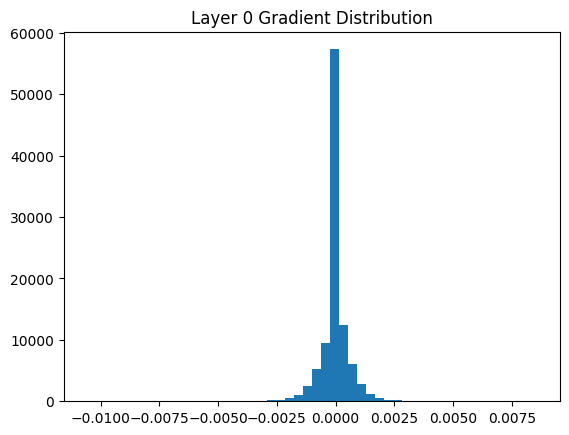

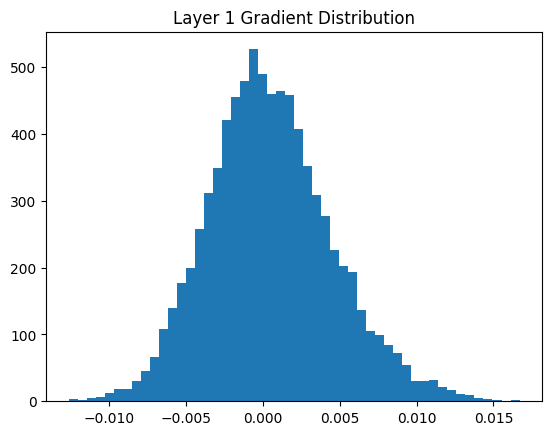

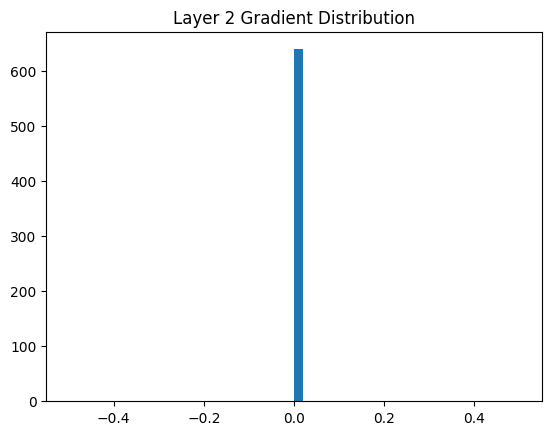

Epoch 1/20 - Train Loss: 2.6221 - Val Loss: 2.5697
Epoch 2/20 - Train Loss: 2.1185 - Val Loss: 2.0629
Epoch 3/20 - Train Loss: 1.8182 - Val Loss: 1.7605
Epoch 4/20 - Train Loss: 1.6161 - Val Loss: 1.5582
Epoch 5/20 - Train Loss: 1.4702 - Val Loss: 1.4129
Epoch 6/20 - Train Loss: 1.3578 - Val Loss: 1.2995
Epoch 7/20 - Train Loss: 1.2695 - Val Loss: 1.2114
Epoch 8/20 - Train Loss: 1.1971 - Val Loss: 1.1383
Epoch 9/20 - Train Loss: 1.1375 - Val Loss: 1.0797
Epoch 10/20 - Train Loss: 1.0875 - Val Loss: 1.0310
Epoch 11/20 - Train Loss: 1.0447 - Val Loss: 0.9891
Epoch 12/20 - Train Loss: 1.0069 - Val Loss: 0.9522
Epoch 13/20 - Train Loss: 0.9739 - Val Loss: 0.9205
Epoch 14/20 - Train Loss: 0.9443 - Val Loss: 0.8919
Epoch 15/20 - Train Loss: 0.9188 - Val Loss: 0.8667
Epoch 16/20 - Train Loss: 0.8955 - Val Loss: 0.8436
Epoch 17/20 - Train Loss: 0.8742 - Val Loss: 0.8223
Epoch 18/20 - Train Loss: 0.8548 - Val Loss: 0.8041
Epoch 19/20 - Train Loss: 0.8372 - Val Loss: 0.7867
Epoch 20/20 - Train L

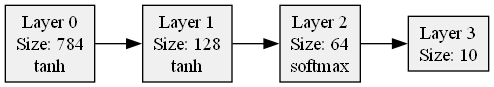

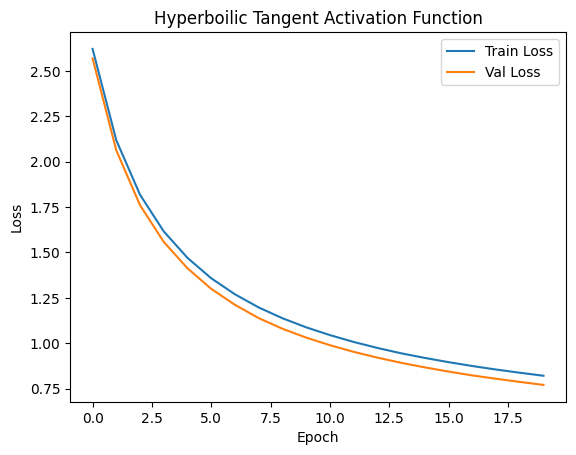

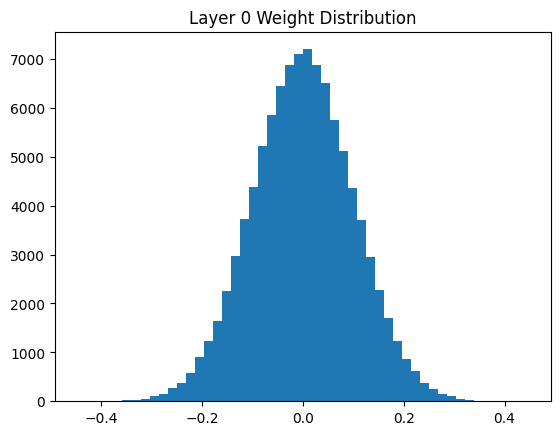

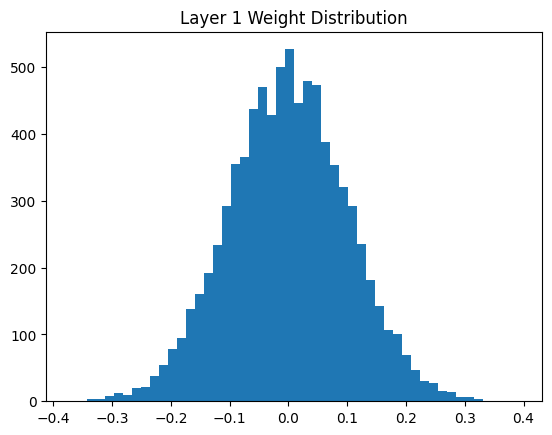

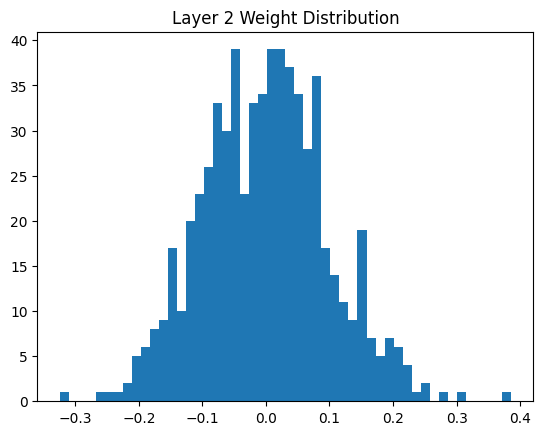

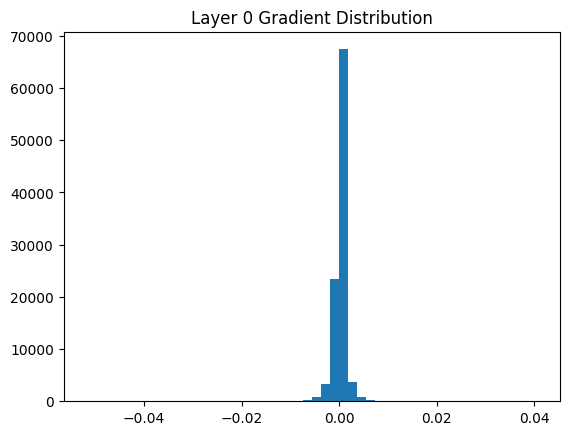

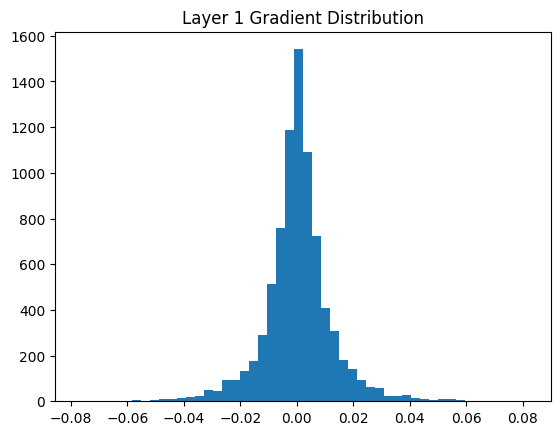

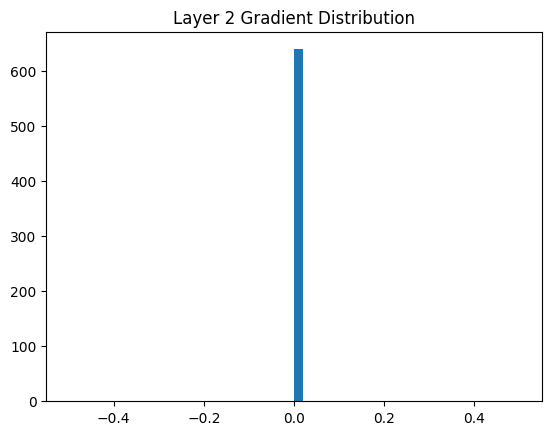

Epoch 1/20 - Train Loss: 1.4107 - Val Loss: 1.3863
Epoch 2/20 - Train Loss: 1.0042 - Val Loss: 1.0005
Epoch 3/20 - Train Loss: 0.8195 - Val Loss: 0.8231
Epoch 4/20 - Train Loss: 0.7105 - Val Loss: 0.7253
Epoch 5/20 - Train Loss: 0.6376 - Val Loss: 0.6610
Epoch 6/20 - Train Loss: 0.5842 - Val Loss: 0.6111
Epoch 7/20 - Train Loss: 0.5425 - Val Loss: 0.5787
Epoch 8/20 - Train Loss: 0.5091 - Val Loss: 0.5475
Epoch 9/20 - Train Loss: 0.4825 - Val Loss: 0.5250
Epoch 10/20 - Train Loss: 0.4598 - Val Loss: 0.5071
Epoch 11/20 - Train Loss: 0.4405 - Val Loss: 0.4915
Epoch 12/20 - Train Loss: 0.4244 - Val Loss: 0.4776
Epoch 13/20 - Train Loss: 0.4102 - Val Loss: 0.4679
Epoch 14/20 - Train Loss: 0.3975 - Val Loss: 0.4585
Epoch 15/20 - Train Loss: 0.3865 - Val Loss: 0.4515
Epoch 16/20 - Train Loss: 0.3763 - Val Loss: 0.4446
Epoch 17/20 - Train Loss: 0.3671 - Val Loss: 0.4362
Epoch 18/20 - Train Loss: 0.3587 - Val Loss: 0.4311
Epoch 19/20 - Train Loss: 0.3510 - Val Loss: 0.4247
Epoch 20/20 - Train L

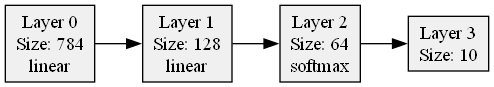

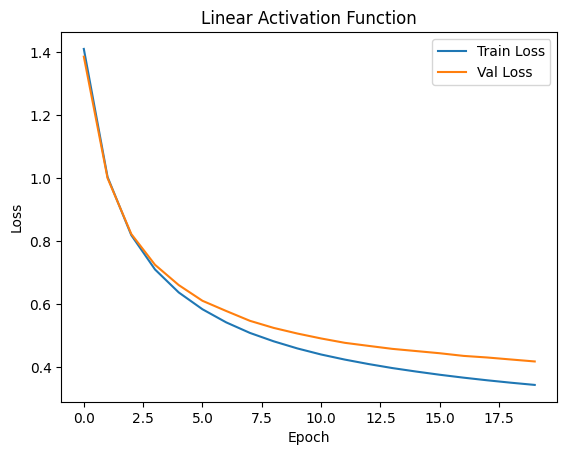

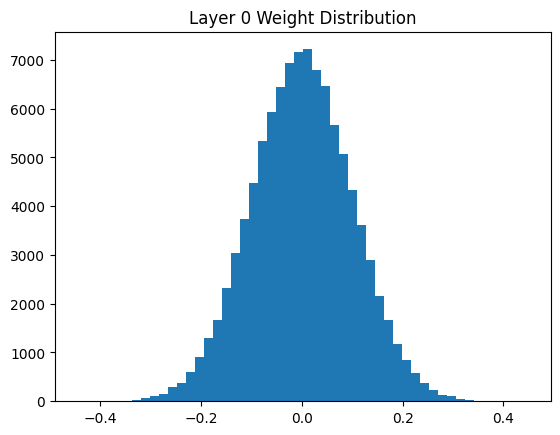

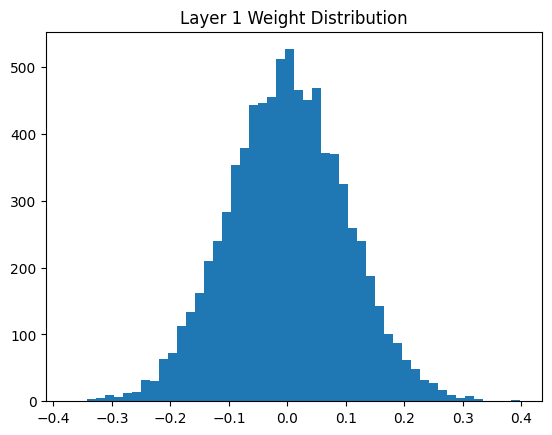

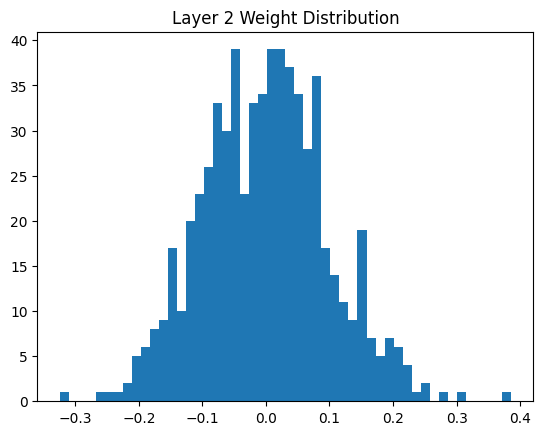

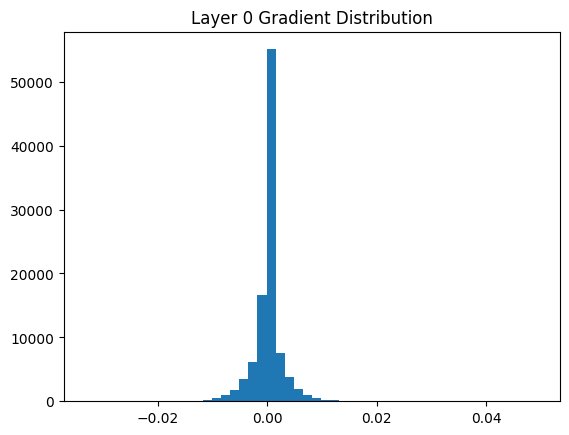

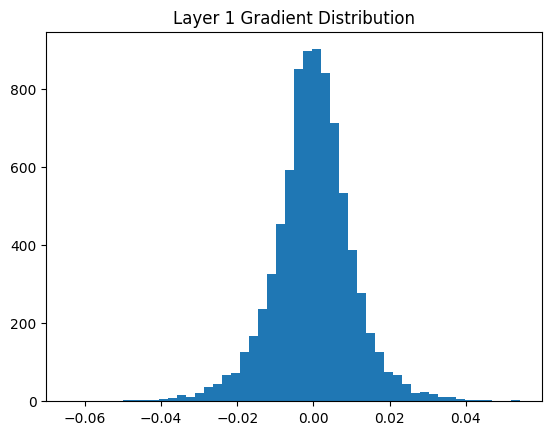

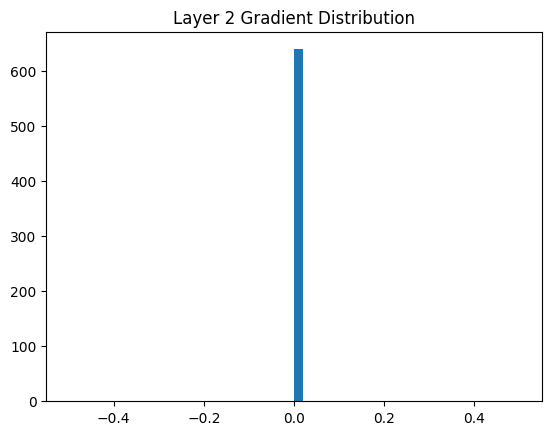


================= Hasil Perbandingan =================
ReLU accuracy: 82.59% | Waktu: 6.32s
Sigmoid accuracy: 30.01% | Waktu: 7.12s
tanh accuracy: 76.27% | Waktu: 7.18s
Linear accuracy: 86.56% | Waktu: 6.67s


In [19]:
## Variasi activation FFNN

# 1. ReLU
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('ReLU Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
ReLU_accuracy = np.mean(test_pred_classes == y_test_int)
ReLU_time = time.time() - t0


# 2. Sigmoid
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['sigmoid', 'sigmoid', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Sigmoid Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
sigmoid_accuracy = np.mean(test_pred_classes == y_test_int)
sigmoid_time = time.time() - t0


# 3. Tanh
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['tanh', 'tanh', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Hyperboilic Tangent Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tanh_accuracy = np.mean(test_pred_classes == y_test_int)
tanh_time = time.time() - t0


# 4. Linear
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['linear', 'linear', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()


plt.title('Linear Activation Function')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
linear_accuracy = np.mean(test_pred_classes == y_test_int)
linear_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"ReLU accuracy: {ReLU_accuracy * 100:.2f}% | Waktu: {ReLU_time:.2f}s")
print(f"Sigmoid accuracy: {sigmoid_accuracy * 100:.2f}% | Waktu: {sigmoid_time:.2f}s")
print(f"tanh accuracy: {tanh_accuracy * 100:.2f}% | Waktu: {tanh_time:.2f}s")
print(f"Linear accuracy: {linear_accuracy * 100:.2f}% | Waktu: {linear_time:.2f}s")
print("=======================================================")

## Learning Rate Variation

Epoch 1/20 - Train Loss: 2.5824 - Val Loss: 2.5530
Epoch 2/20 - Train Loss: 2.5069 - Val Loss: 2.4847
Epoch 3/20 - Train Loss: 2.4387 - Val Loss: 2.4229
Epoch 4/20 - Train Loss: 2.3774 - Val Loss: 2.3673
Epoch 5/20 - Train Loss: 2.3206 - Val Loss: 2.3159
Epoch 6/20 - Train Loss: 2.2682 - Val Loss: 2.2683
Epoch 7/20 - Train Loss: 2.2203 - Val Loss: 2.2245
Epoch 8/20 - Train Loss: 2.1755 - Val Loss: 2.1836
Epoch 9/20 - Train Loss: 2.1339 - Val Loss: 2.1451
Epoch 10/20 - Train Loss: 2.0943 - Val Loss: 2.1089
Epoch 11/20 - Train Loss: 2.0567 - Val Loss: 2.0742
Epoch 12/20 - Train Loss: 2.0207 - Val Loss: 2.0409
Epoch 13/20 - Train Loss: 1.9862 - Val Loss: 2.0094
Epoch 14/20 - Train Loss: 1.9531 - Val Loss: 1.9787
Epoch 15/20 - Train Loss: 1.9211 - Val Loss: 1.9490
Epoch 16/20 - Train Loss: 1.8904 - Val Loss: 1.9201
Epoch 17/20 - Train Loss: 1.8608 - Val Loss: 1.8923
Epoch 18/20 - Train Loss: 1.8319 - Val Loss: 1.8652
Epoch 19/20 - Train Loss: 1.8035 - Val Loss: 1.8385
Epoch 20/20 - Train L

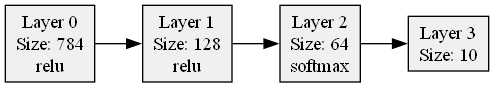

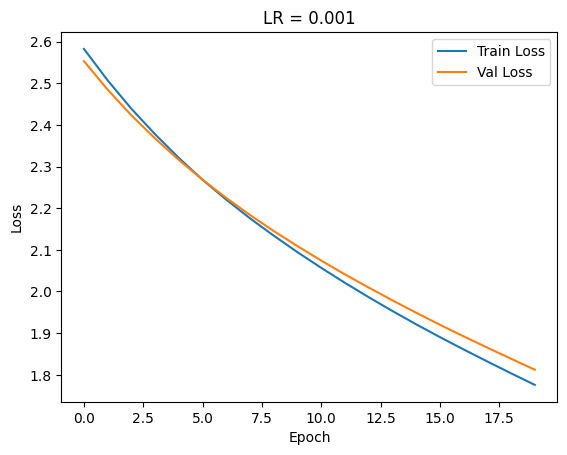

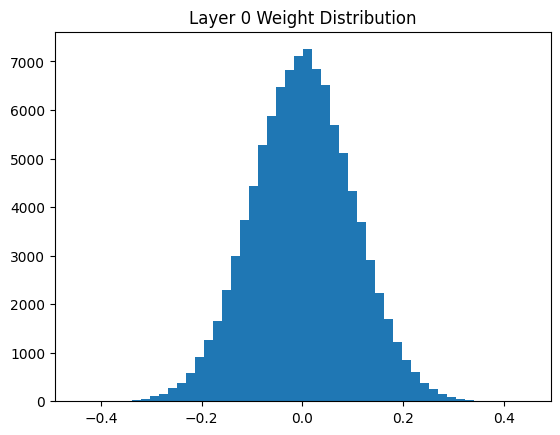

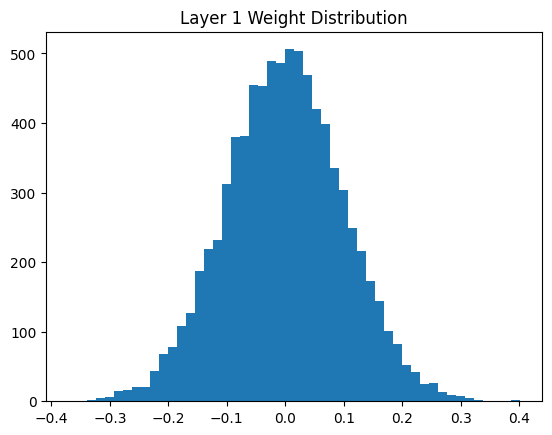

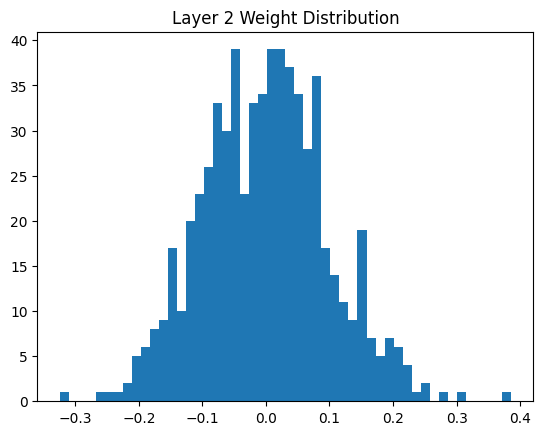

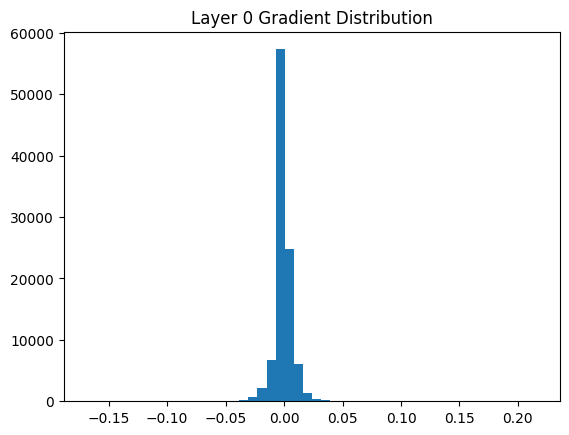

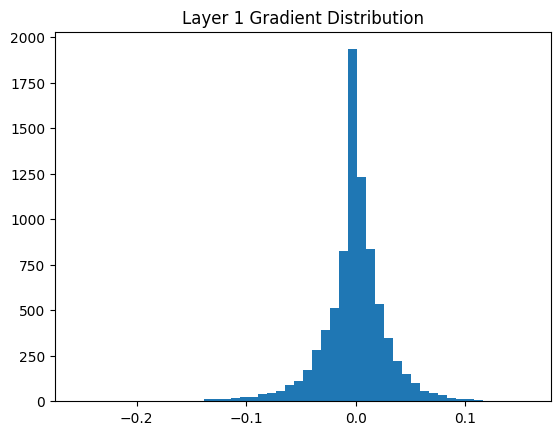

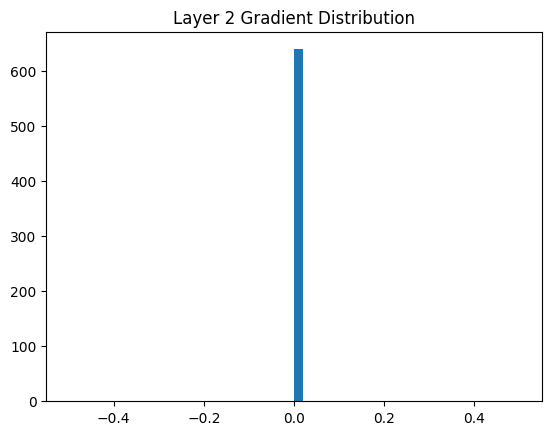

Epoch 1/20 - Train Loss: 2.0908 - Val Loss: 2.1068
Epoch 2/20 - Train Loss: 1.7758 - Val Loss: 1.8125
Epoch 3/20 - Train Loss: 1.5362 - Val Loss: 1.5811
Epoch 4/20 - Train Loss: 1.3508 - Val Loss: 1.4006
Epoch 5/20 - Train Loss: 1.2080 - Val Loss: 1.2630
Epoch 6/20 - Train Loss: 1.0949 - Val Loss: 1.1521
Epoch 7/20 - Train Loss: 1.0041 - Val Loss: 1.0648
Epoch 8/20 - Train Loss: 0.9294 - Val Loss: 0.9939
Epoch 9/20 - Train Loss: 0.8667 - Val Loss: 0.9302
Epoch 10/20 - Train Loss: 0.8128 - Val Loss: 0.8814
Epoch 11/20 - Train Loss: 0.7664 - Val Loss: 0.8357
Epoch 12/20 - Train Loss: 0.7257 - Val Loss: 0.7957
Epoch 13/20 - Train Loss: 0.6896 - Val Loss: 0.7631
Epoch 14/20 - Train Loss: 0.6574 - Val Loss: 0.7303
Epoch 15/20 - Train Loss: 0.6287 - Val Loss: 0.7029
Epoch 16/20 - Train Loss: 0.6027 - Val Loss: 0.6773
Epoch 17/20 - Train Loss: 0.5791 - Val Loss: 0.6537
Epoch 18/20 - Train Loss: 0.5575 - Val Loss: 0.6363
Epoch 19/20 - Train Loss: 0.5379 - Val Loss: 0.6166
Epoch 20/20 - Train L

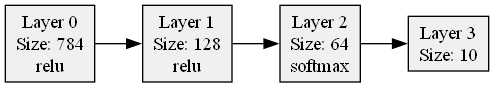

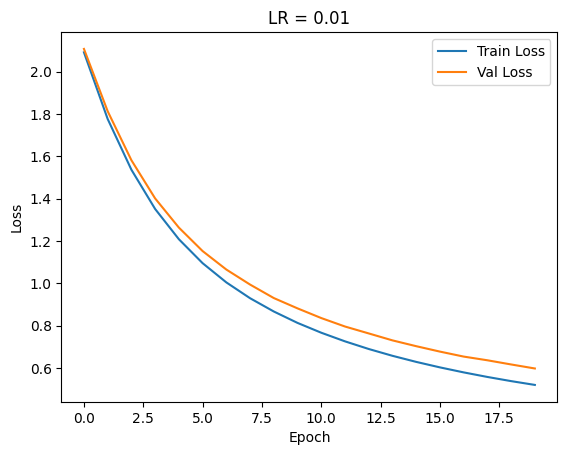

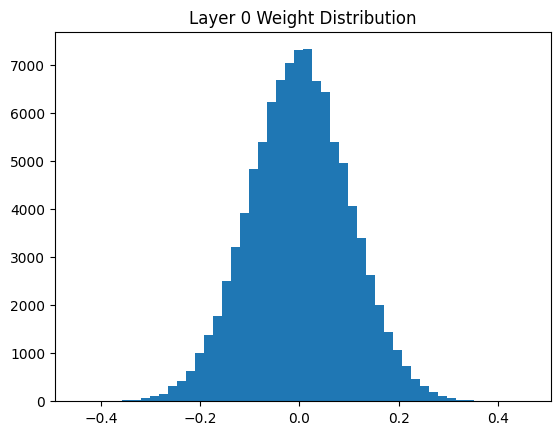

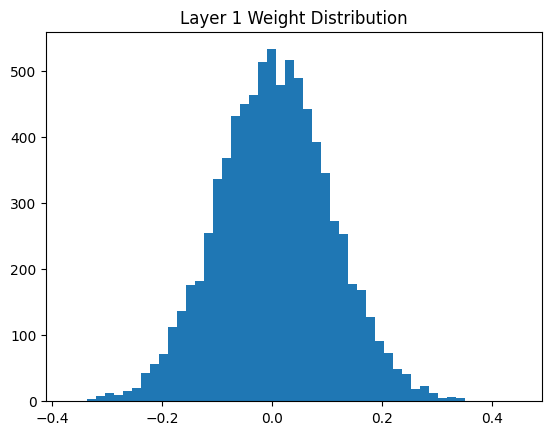

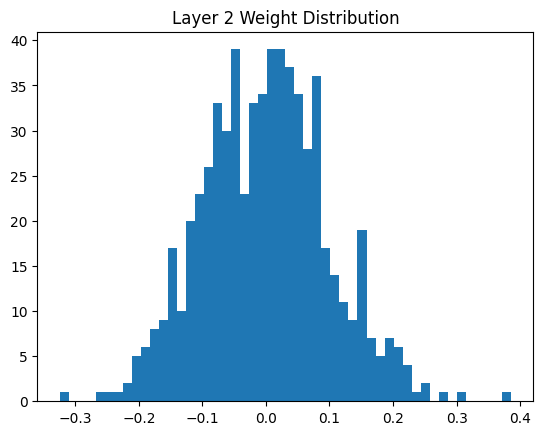

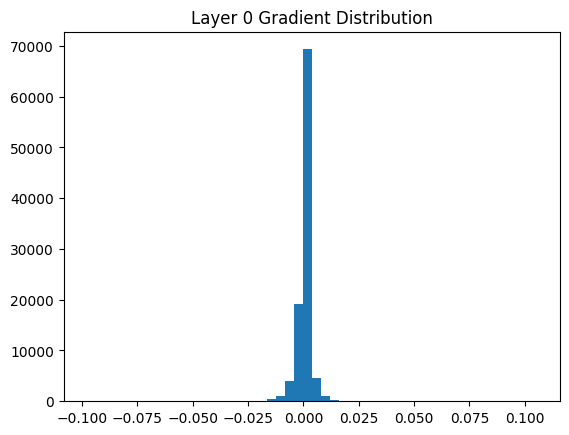

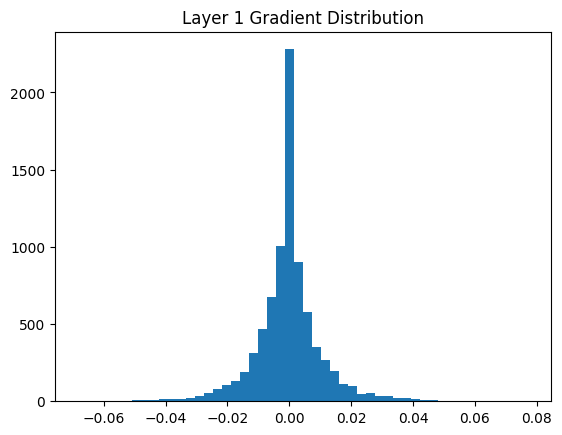

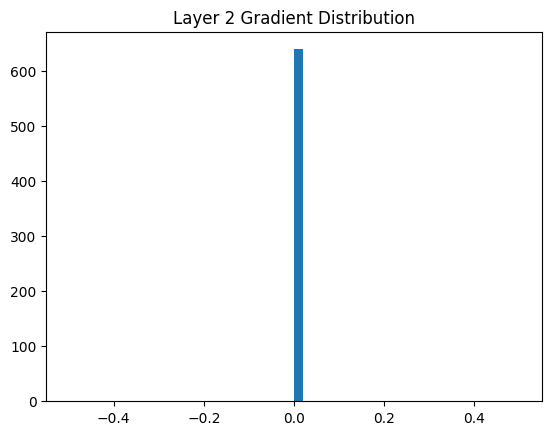

Epoch 1/20 - Train Loss: 0.8375 - Val Loss: 0.9152
Epoch 2/20 - Train Loss: 0.5283 - Val Loss: 0.6113
Epoch 3/20 - Train Loss: 0.4067 - Val Loss: 0.4879
Epoch 4/20 - Train Loss: 0.3333 - Val Loss: 0.4316
Epoch 5/20 - Train Loss: 0.2807 - Val Loss: 0.3820
Epoch 6/20 - Train Loss: 0.2435 - Val Loss: 0.3525
Epoch 7/20 - Train Loss: 0.2163 - Val Loss: 0.3419
Epoch 8/20 - Train Loss: 0.1972 - Val Loss: 0.3200
Epoch 9/20 - Train Loss: 0.1809 - Val Loss: 0.3173
Epoch 10/20 - Train Loss: 0.1580 - Val Loss: 0.2992
Epoch 11/20 - Train Loss: 0.1428 - Val Loss: 0.2863
Epoch 12/20 - Train Loss: 0.1347 - Val Loss: 0.2807
Epoch 13/20 - Train Loss: 0.1198 - Val Loss: 0.2809
Epoch 14/20 - Train Loss: 0.1125 - Val Loss: 0.2729
Epoch 15/20 - Train Loss: 0.1033 - Val Loss: 0.2701
Epoch 16/20 - Train Loss: 0.0950 - Val Loss: 0.2737
Epoch 17/20 - Train Loss: 0.0873 - Val Loss: 0.2614
Epoch 18/20 - Train Loss: 0.0810 - Val Loss: 0.2640
Epoch 19/20 - Train Loss: 0.0755 - Val Loss: 0.2597
Epoch 20/20 - Train L

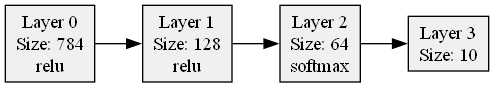

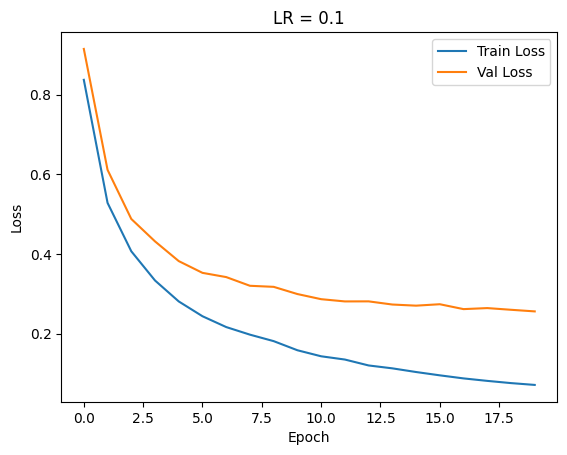

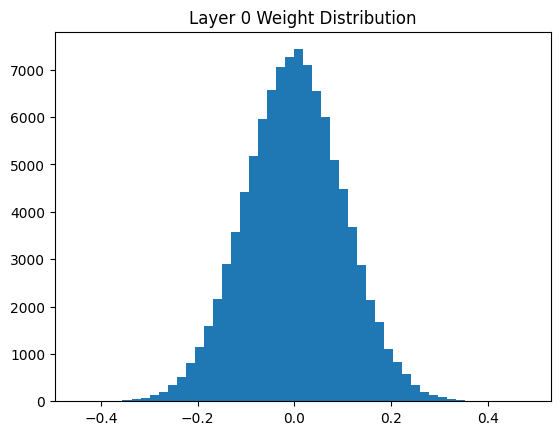

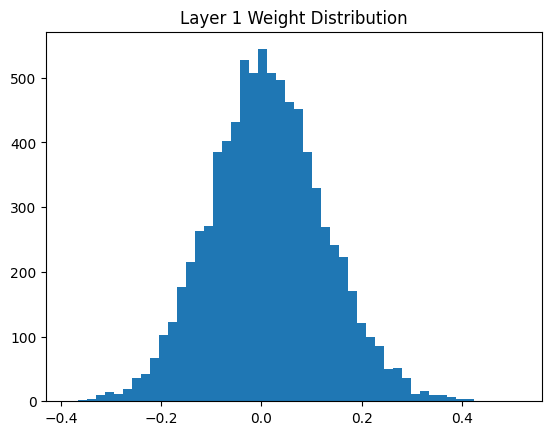

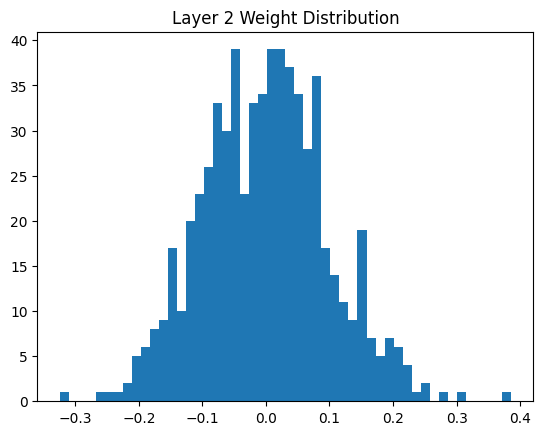

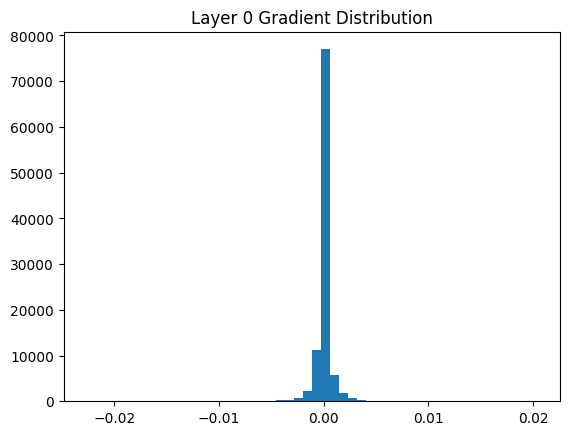

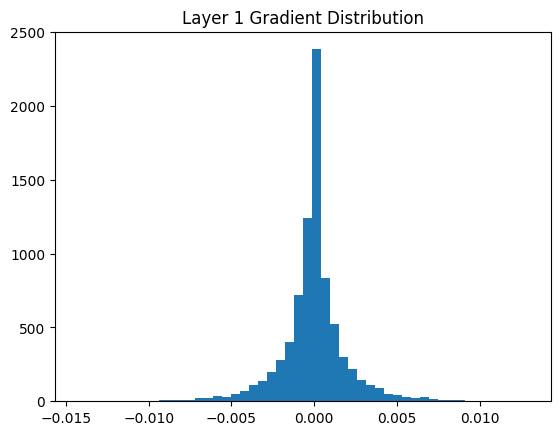

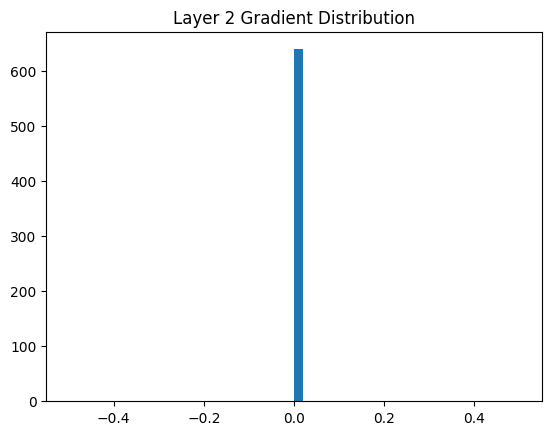


================= Hasil Perbandingan =================
TC 1 Accuracy: 42.49% | Waktu: 6.27s
TC 2 Accuracy: 82.59% | Waktu: 4.72s
TC 3 Accuracy: 91.39% | Waktu: 3.85s


In [20]:
## Variasi activation FFNN

# 1. Learning Rate = 0.001
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.001,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.001')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc1_accuracy = np.mean(test_pred_classes == y_test_int)
tc1_time = time.time() - t0


# 2. Learning Rate = 0.01
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.01')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc2_accuracy = np.mean(test_pred_classes == y_test_int)
tc2_time = time.time() - t0


# 3. Learning Rate = 0.1
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.1,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('LR = 0.1')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
tc3_accuracy = np.mean(test_pred_classes == y_test_int)
tc3_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"TC 1 Accuracy: {tc1_accuracy * 100:.2f}% | Waktu: {tc1_time:.2f}s")
print(f"TC 2 Accuracy: {tc2_accuracy * 100:.2f}% | Waktu: {tc2_time:.2f}s")
print(f"TC 3 Accuracy: {tc3_accuracy * 100:.2f}% | Waktu: {tc3_time:.2f}s")
print("=======================================================")

## Weight Initialization Variation

Epoch 1/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 2/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 3/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 4/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 5/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 6/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 7/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 8/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 9/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 10/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 11/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 12/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 13/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 14/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 15/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 16/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 17/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 18/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 19/20 - Train Loss: 2.3026 - Val Loss: 2.3026
Epoch 20/20 - Train L

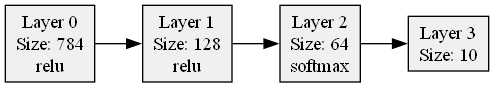

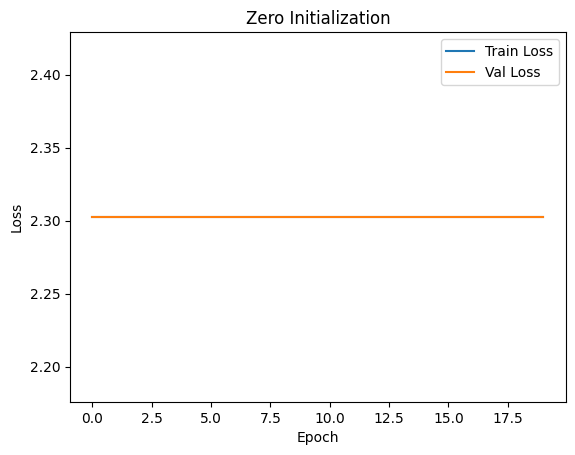

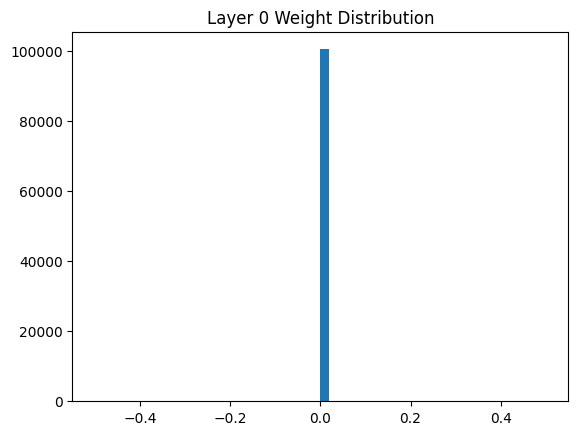

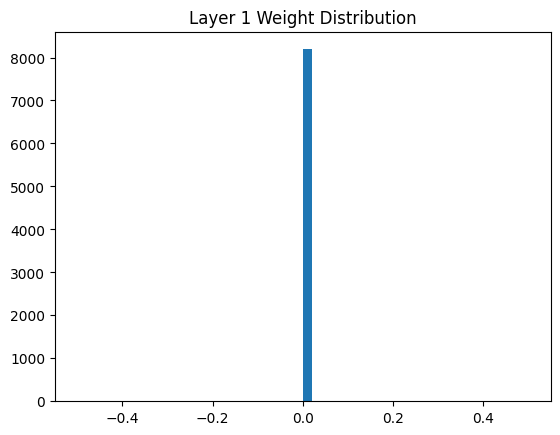

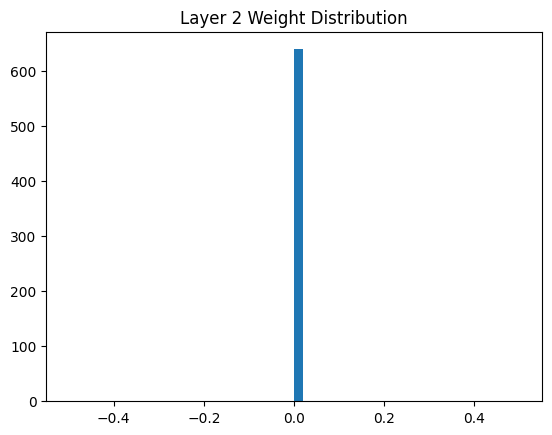

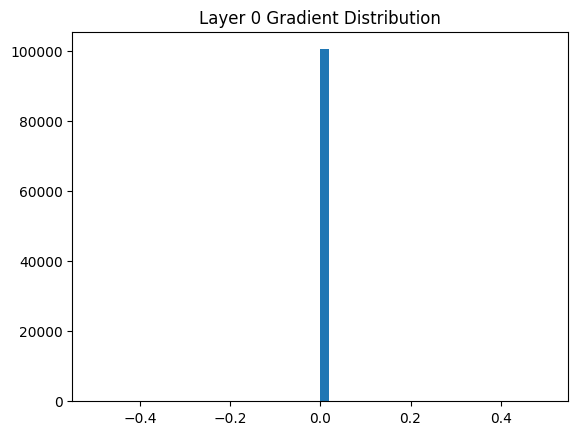

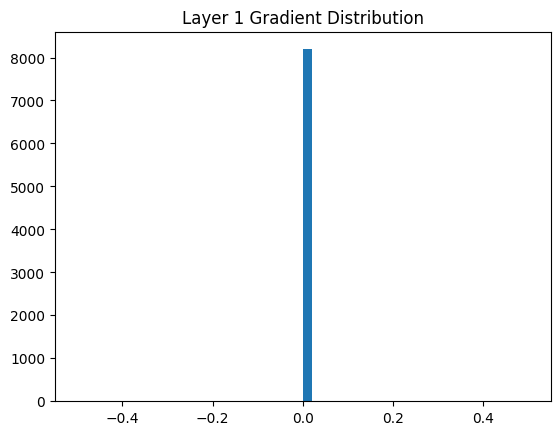

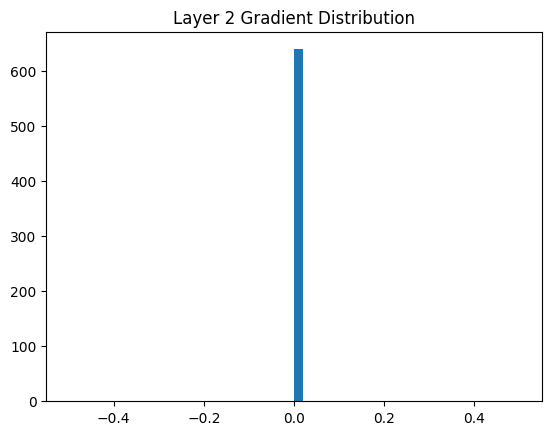

Epoch 1/20 - Train Loss: 11.7373 - Val Loss: 12.1930
Epoch 2/20 - Train Loss: 8.2203 - Val Loss: 9.6032
Epoch 3/20 - Train Loss: 6.0584 - Val Loss: 8.0860
Epoch 4/20 - Train Loss: 4.9126 - Val Loss: 7.7038
Epoch 5/20 - Train Loss: 4.0976 - Val Loss: 7.5389
Epoch 6/20 - Train Loss: 3.4681 - Val Loss: 6.9296
Epoch 7/20 - Train Loss: 3.1441 - Val Loss: 6.9856
Epoch 8/20 - Train Loss: 2.4454 - Val Loss: 6.7546
Epoch 9/20 - Train Loss: 2.0527 - Val Loss: 6.6207
Epoch 10/20 - Train Loss: 1.8325 - Val Loss: 6.4214
Epoch 11/20 - Train Loss: 1.5064 - Val Loss: 6.4825
Epoch 12/20 - Train Loss: 1.5368 - Val Loss: 6.5941
Epoch 13/20 - Train Loss: 1.1331 - Val Loss: 6.2494
Epoch 14/20 - Train Loss: 0.9661 - Val Loss: 6.3265
Epoch 15/20 - Train Loss: 0.8654 - Val Loss: 6.3556
Epoch 16/20 - Train Loss: 0.7473 - Val Loss: 6.3381
Epoch 17/20 - Train Loss: 0.7062 - Val Loss: 6.2325
Epoch 18/20 - Train Loss: 0.6027 - Val Loss: 6.3218
Epoch 19/20 - Train Loss: 0.5723 - Val Loss: 6.1721
Epoch 20/20 - Train

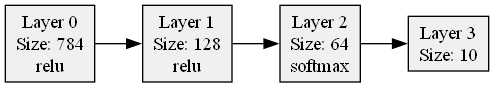

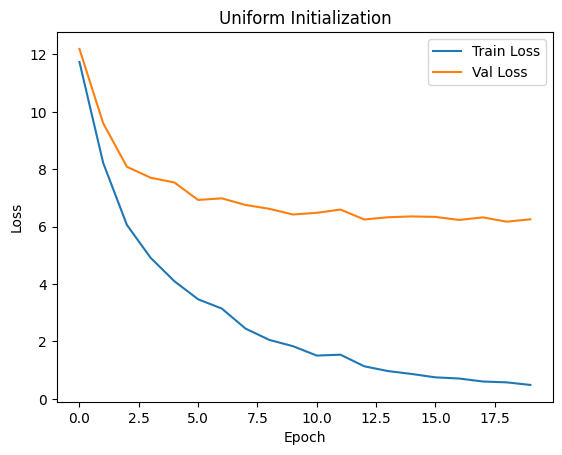

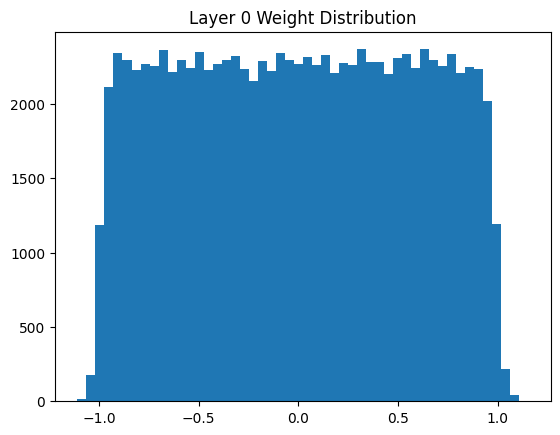

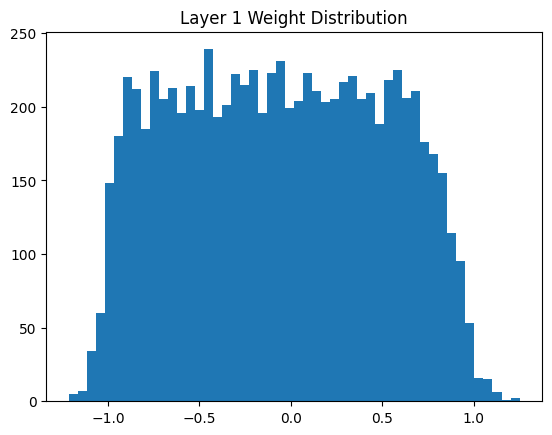

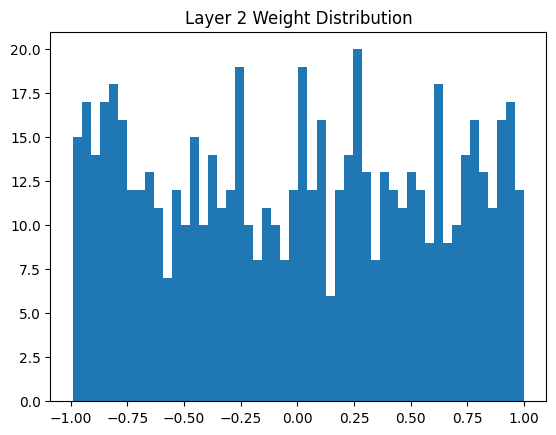

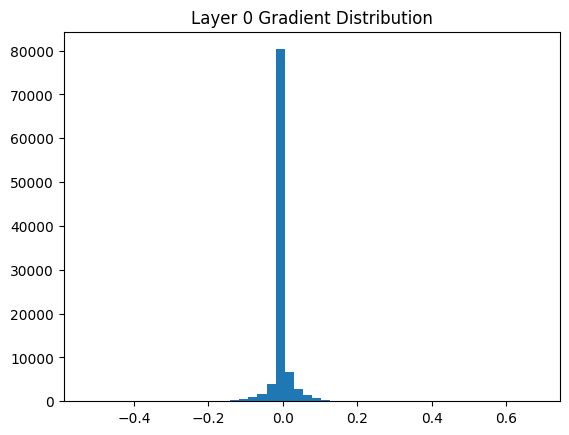

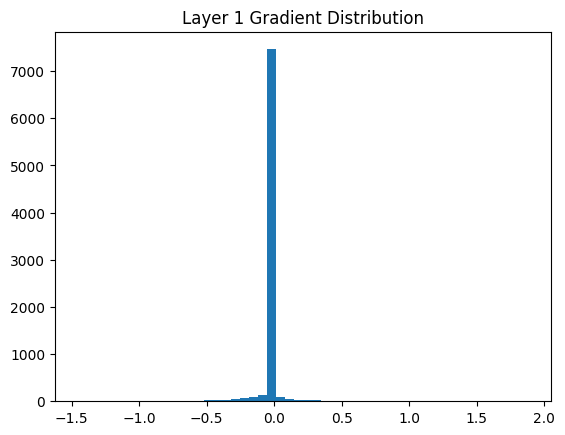

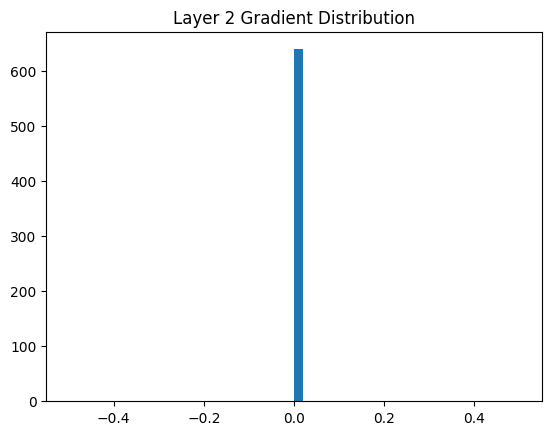

Epoch 1/20 - Train Loss: 2.0908 - Val Loss: 2.1068
Epoch 2/20 - Train Loss: 1.7758 - Val Loss: 1.8125
Epoch 3/20 - Train Loss: 1.5362 - Val Loss: 1.5811
Epoch 4/20 - Train Loss: 1.3508 - Val Loss: 1.4006
Epoch 5/20 - Train Loss: 1.2080 - Val Loss: 1.2630
Epoch 6/20 - Train Loss: 1.0949 - Val Loss: 1.1521
Epoch 7/20 - Train Loss: 1.0041 - Val Loss: 1.0648
Epoch 8/20 - Train Loss: 0.9294 - Val Loss: 0.9939
Epoch 9/20 - Train Loss: 0.8667 - Val Loss: 0.9302
Epoch 10/20 - Train Loss: 0.8128 - Val Loss: 0.8814
Epoch 11/20 - Train Loss: 0.7664 - Val Loss: 0.8357
Epoch 12/20 - Train Loss: 0.7257 - Val Loss: 0.7957
Epoch 13/20 - Train Loss: 0.6896 - Val Loss: 0.7631
Epoch 14/20 - Train Loss: 0.6574 - Val Loss: 0.7303
Epoch 15/20 - Train Loss: 0.6287 - Val Loss: 0.7029
Epoch 16/20 - Train Loss: 0.6027 - Val Loss: 0.6773
Epoch 17/20 - Train Loss: 0.5791 - Val Loss: 0.6537
Epoch 18/20 - Train Loss: 0.5575 - Val Loss: 0.6363
Epoch 19/20 - Train Loss: 0.5379 - Val Loss: 0.6166
Epoch 20/20 - Train L

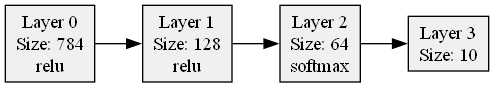

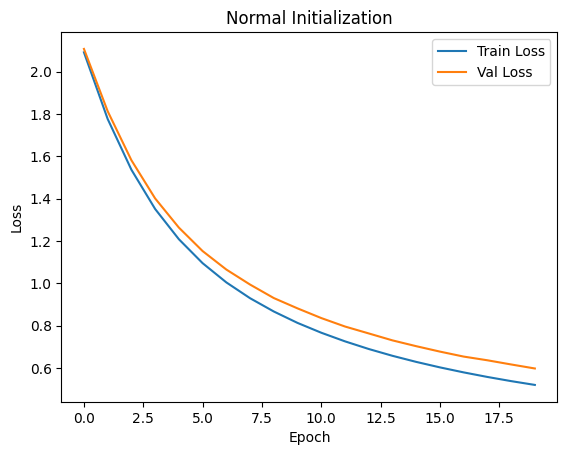

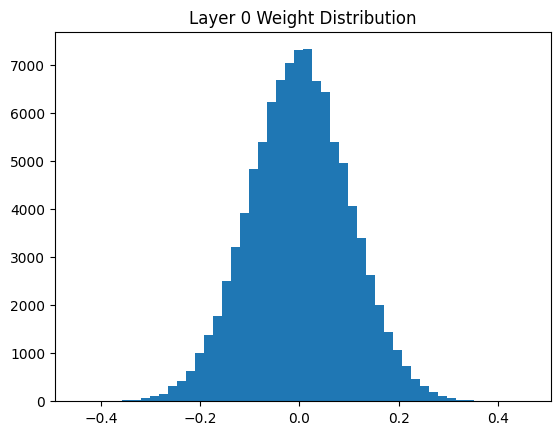

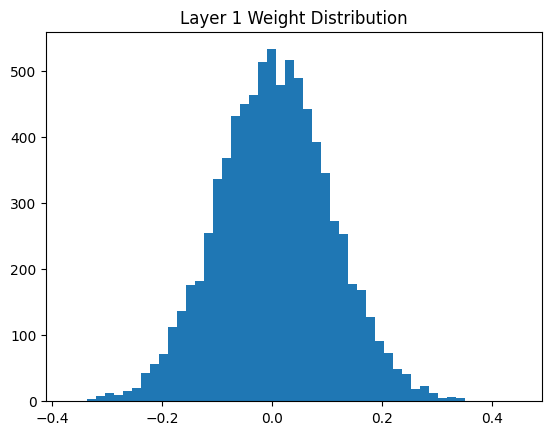

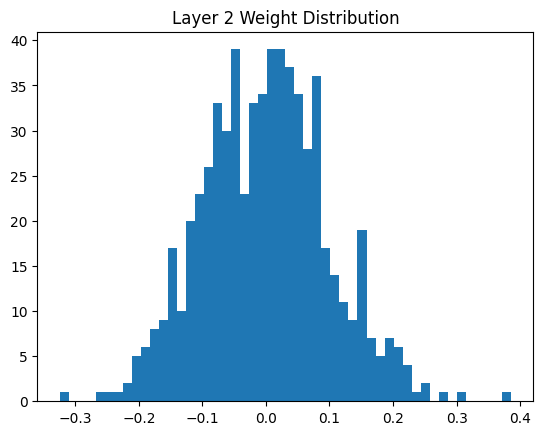

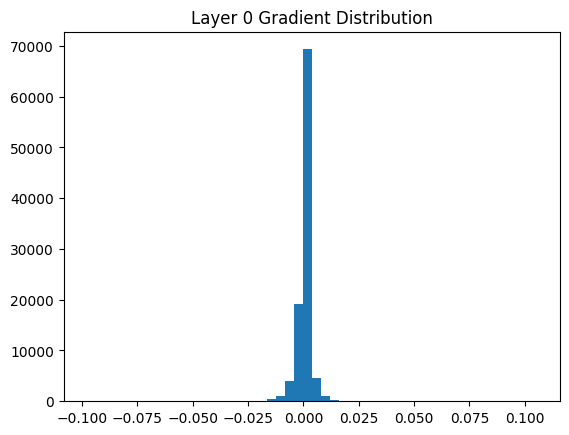

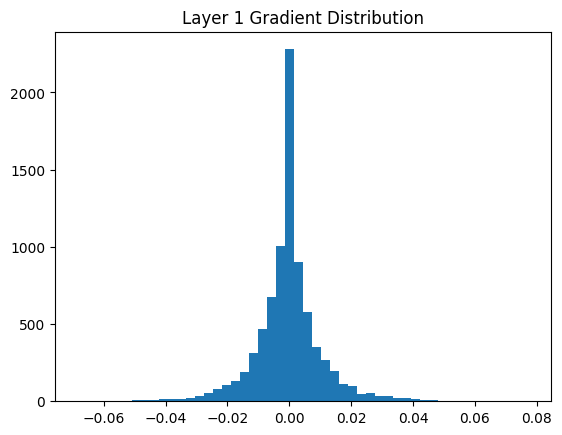

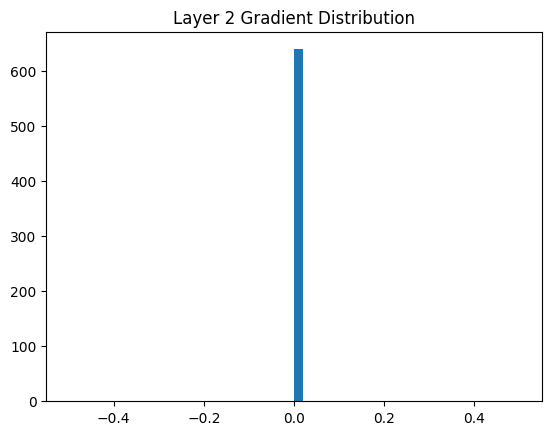


================= Hasil Perbandingan =================
Zero Initialization Accuracy: 9.75% | Waktu: 4.55s
Uniform Initialization Accuracy: 74.03% | Waktu: 4.75s
Normal Initialization Accuracy: 82.59% | Waktu: 5.31s


In [21]:
## Variasi weight initialization
# 1. Zero initialization
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'zero'},
    {'method': 'zero'},
    {'method': 'zero'}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Zero Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
zero_accuracy = np.mean(test_pred_classes == y_test_int)
zero_time = time.time() - t0

# 2. Uniform
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42},
    {'method': 'uniform', 'lower': -1, 'upper': 1, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Uniform Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
uniform_accuracy = np.mean(test_pred_classes == y_test_int)
uniform_time = time.time() - t0

# 3. Normal
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu','softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.title('Normal Initialization')
plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

ffnn_model.plot_distribution(layers=[0, 1, 2])
ffnn_model.plot_gradient_distribution(layers=[0, 1, 2])

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
y_test_int = y_test.astype(int)
normal_accuracy = np.mean(test_pred_classes == y_test_int)
normal_time = time.time() - t0

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"Zero Initialization Accuracy: {zero_accuracy * 100:.2f}% | Waktu: {zero_time:.2f}s")
print(f"Uniform Initialization Accuracy: {uniform_accuracy * 100:.2f}% | Waktu: {uniform_time:.2f}s")
print(f"Normal Initialization Accuracy: {normal_accuracy * 100:.2f}% | Waktu: {normal_time:.2f}s")
print("=======================================================")

## Compare with sklearn

Epoch 1/20 - Train Loss: 2.0908 - Val Loss: 2.1068
Epoch 2/20 - Train Loss: 1.7758 - Val Loss: 1.8125
Epoch 3/20 - Train Loss: 1.5362 - Val Loss: 1.5811
Epoch 4/20 - Train Loss: 1.3508 - Val Loss: 1.4006
Epoch 5/20 - Train Loss: 1.2080 - Val Loss: 1.2630
Epoch 6/20 - Train Loss: 1.0949 - Val Loss: 1.1521
Epoch 7/20 - Train Loss: 1.0041 - Val Loss: 1.0648
Epoch 8/20 - Train Loss: 0.9294 - Val Loss: 0.9939
Epoch 9/20 - Train Loss: 0.8667 - Val Loss: 0.9302
Epoch 10/20 - Train Loss: 0.8128 - Val Loss: 0.8814
Epoch 11/20 - Train Loss: 0.7664 - Val Loss: 0.8357
Epoch 12/20 - Train Loss: 0.7257 - Val Loss: 0.7957
Epoch 13/20 - Train Loss: 0.6896 - Val Loss: 0.7631
Epoch 14/20 - Train Loss: 0.6574 - Val Loss: 0.7303
Epoch 15/20 - Train Loss: 0.6287 - Val Loss: 0.7029
Epoch 16/20 - Train Loss: 0.6027 - Val Loss: 0.6773
Epoch 17/20 - Train Loss: 0.5791 - Val Loss: 0.6537
Epoch 18/20 - Train Loss: 0.5575 - Val Loss: 0.6363
Epoch 19/20 - Train Loss: 0.5379 - Val Loss: 0.6166
Epoch 20/20 - Train L

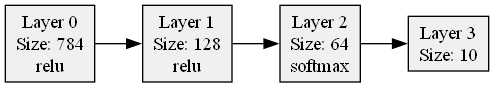

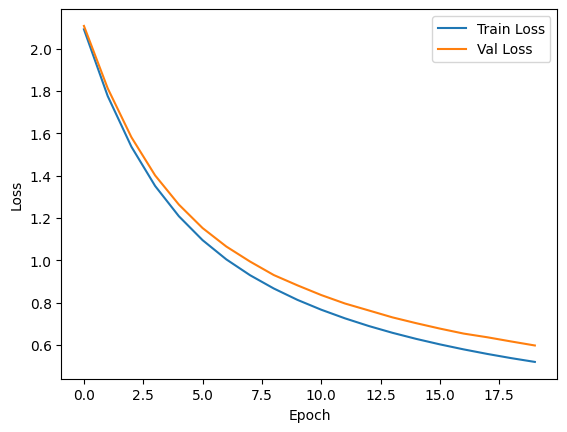

Iteration 1, loss = 1.08637988
Iteration 2, loss = 0.31494149
Iteration 3, loss = 0.18468047
Iteration 4, loss = 0.12082662
Iteration 5, loss = 0.08204947
Iteration 6, loss = 0.05809902
Iteration 7, loss = 0.04218392
Iteration 8, loss = 0.03036946
Iteration 9, loss = 0.02054743
Iteration 10, loss = 0.01543328
Iteration 11, loss = 0.01237439
Iteration 12, loss = 0.00956222
Iteration 13, loss = 0.00793182
Iteration 14, loss = 0.00652515
Iteration 15, loss = 0.00548737
Iteration 16, loss = 0.00472562
Iteration 17, loss = 0.00415007
Iteration 18, loss = 0.00368572
Iteration 19, loss = 0.00322339
Iteration 20, loss = 0.00284658


c:\Users\Jimly\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:690: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  warnings.warn(


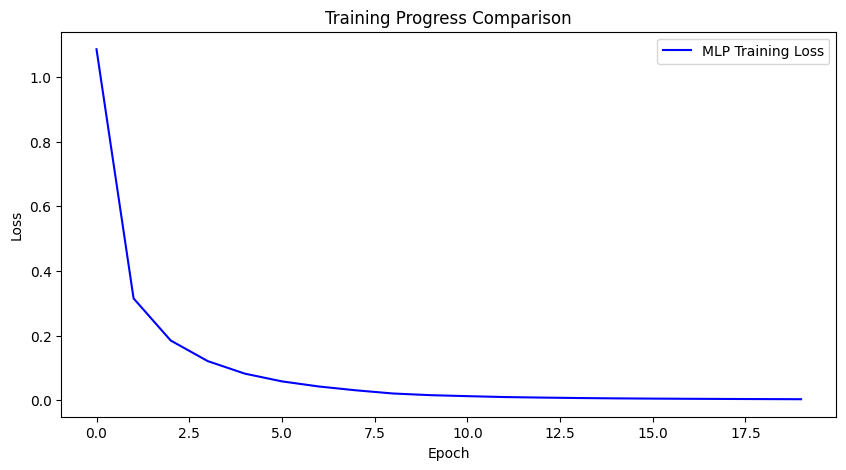

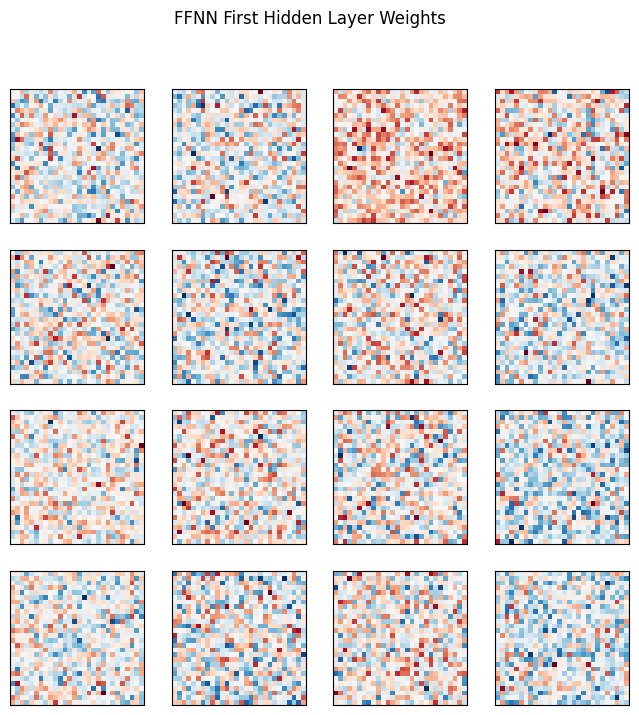


================= Hasil Perbandingan =================
FFNN Test Accuracy: 0.00% | Waktu: 4.39s
MLP Test Accuracy: 93.43% | Waktu: 4.95s


In [22]:

# 3. Implementasi FFNN Kustom
# ==============================
layer_sizes = [784, 128, 64, 10]
activations = ['relu', 'relu', 'softmax']
weight_inits = [
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42},
    {'method': 'normal', 'mean': 0, 'variance': 0.01, 'seed': 42}
]

t0 = time.time()
ffnn_model = FFNN(
    layer_sizes=layer_sizes,
    activations=activations,
    loss_function='categorical_cross_entropy',
    weight_inits=weight_inits
)


# Konversi label ke one-hot encoding
encoder = OneHotEncoder(sparse_output=False)
y_train_onehot = encoder.fit_transform(y_train.reshape(-1, 1))
y_val_onehot = encoder.transform(y_val.reshape(-1, 1))

# Training
history = ffnn_model.train(
    X_train=X_train,
    y_train=y_train_onehot,
    X_val=X_val,
    y_val=y_val_onehot,
    epochs=20,
    batch_size=128,
    learning_rate=0.01,
    verbose=1
)
ffnn_model.plot_as_graph()

plt.plot(history['train_loss'], label='Train Loss')
plt.plot(history['val_loss'], label='Val Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

# Evaluasi
test_pred = ffnn_model.forward(X_test)
test_pred_classes = np.argmax(test_pred, axis=1)
ffnn_accuracy = np.mean(test_pred_classes == y_test)
ffnn_time = time.time() - t0

# 4. Implementasi MLPClassifier
# ==============================
t0 = time.time()
mlp_clf = MLPClassifier(
    hidden_layer_sizes=(128, 64),
    activation='relu',
    solver='adam',
    alpha=0.0001,
    batch_size=128,
    max_iter=20,
    verbose=True,
    random_state=42
)

mlp_clf.fit(X_train, y_train)
mlp_accuracy = mlp_clf.score(X_test, y_test)
mlp_time = time.time() - t0

# 5. Plotting dan Hasil
# ==============================
# Plot akurasi
plt.figure(figsize=(10, 5))
if hasattr(mlp_clf, 'loss_curve_'):
    plt.plot(mlp_clf.loss_curve_, label='MLP Training Loss', color='blue')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training Progress Comparison')
plt.legend()
plt.show()

# Plot bobot layer pertama
fig, axes = plt.subplots(4, 4, figsize=(8, 8))
for i, ax in enumerate(axes.ravel()):
    if i < ffnn_model.layers[0].W.shape[1]:
        ax.imshow(ffnn_model.layers[0].W[:, i].reshape(28, 28), cmap='RdBu_r')
        ax.set_xticks(())
        ax.set_yticks(())
plt.suptitle("FFNN First Hidden Layer Weights")
plt.show()

# Print hasil
print("\n================= Hasil Perbandingan =================")
print(f"FFNN Test Accuracy: {ffnn_accuracy * 100:.2f}% | Waktu: {ffnn_time:.2f}s")
print(f"MLP Test Accuracy: {mlp_accuracy * 100:.2f}% | Waktu: {mlp_time:.2f}s")
print("=======================================================")